In [4]:
import matplotlib.pyplot
import numpy
import pandas

from sklearn import tree, metrics

In [5]:
# Function to replace 'yes' or 'no' with 1.0 or 0.0 in a dataframe row
def replace_yes_no(row):
    def update_value(value):
        if value in ("Yes", "No"):
            return 1.0 if value == "Yes" else 0.0
        return float(value)
    
    return [ update_value(x) for x in row ]

# Load a dataset, convert 'yes' or 'no' to 1.0 or 0.0, and remove NaN values
def load_dataset(path):
    return pandas.read_csv(path).apply(replace_yes_no).dropna()

In [6]:
dataframe = load_dataset("datasets/SleepStudyData.csv")
dataframe

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,1.0,8.0,1.0,1.0,3.0,1.0
1,0.0,6.0,1.0,1.0,3.0,0.0
2,1.0,6.0,1.0,1.0,2.0,1.0
3,0.0,7.0,1.0,1.0,4.0,0.0
4,0.0,7.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...
99,0.0,7.0,1.0,1.0,2.0,1.0
100,0.0,7.0,0.0,1.0,3.0,1.0
101,1.0,8.0,1.0,1.0,3.0,1.0
102,1.0,7.0,1.0,1.0,2.0,1.0


In [7]:
def get_data(dataframe):
    # Remove column with answers to create the input dataframe
    input_data = dataframe.drop(columns = ["Enough"])

    # Just grab the column with answers to create the expected output dataframe
    output_data = dataframe["Enough"]
    
    return input_data, output_data

In [8]:
input_data, output_data = get_data(dataframe)

In [9]:
# Pass training data to the decision tree classifier
classifier = tree.DecisionTreeClassifier()
classifier.fit(input_data, output_data)

DecisionTreeClassifier()

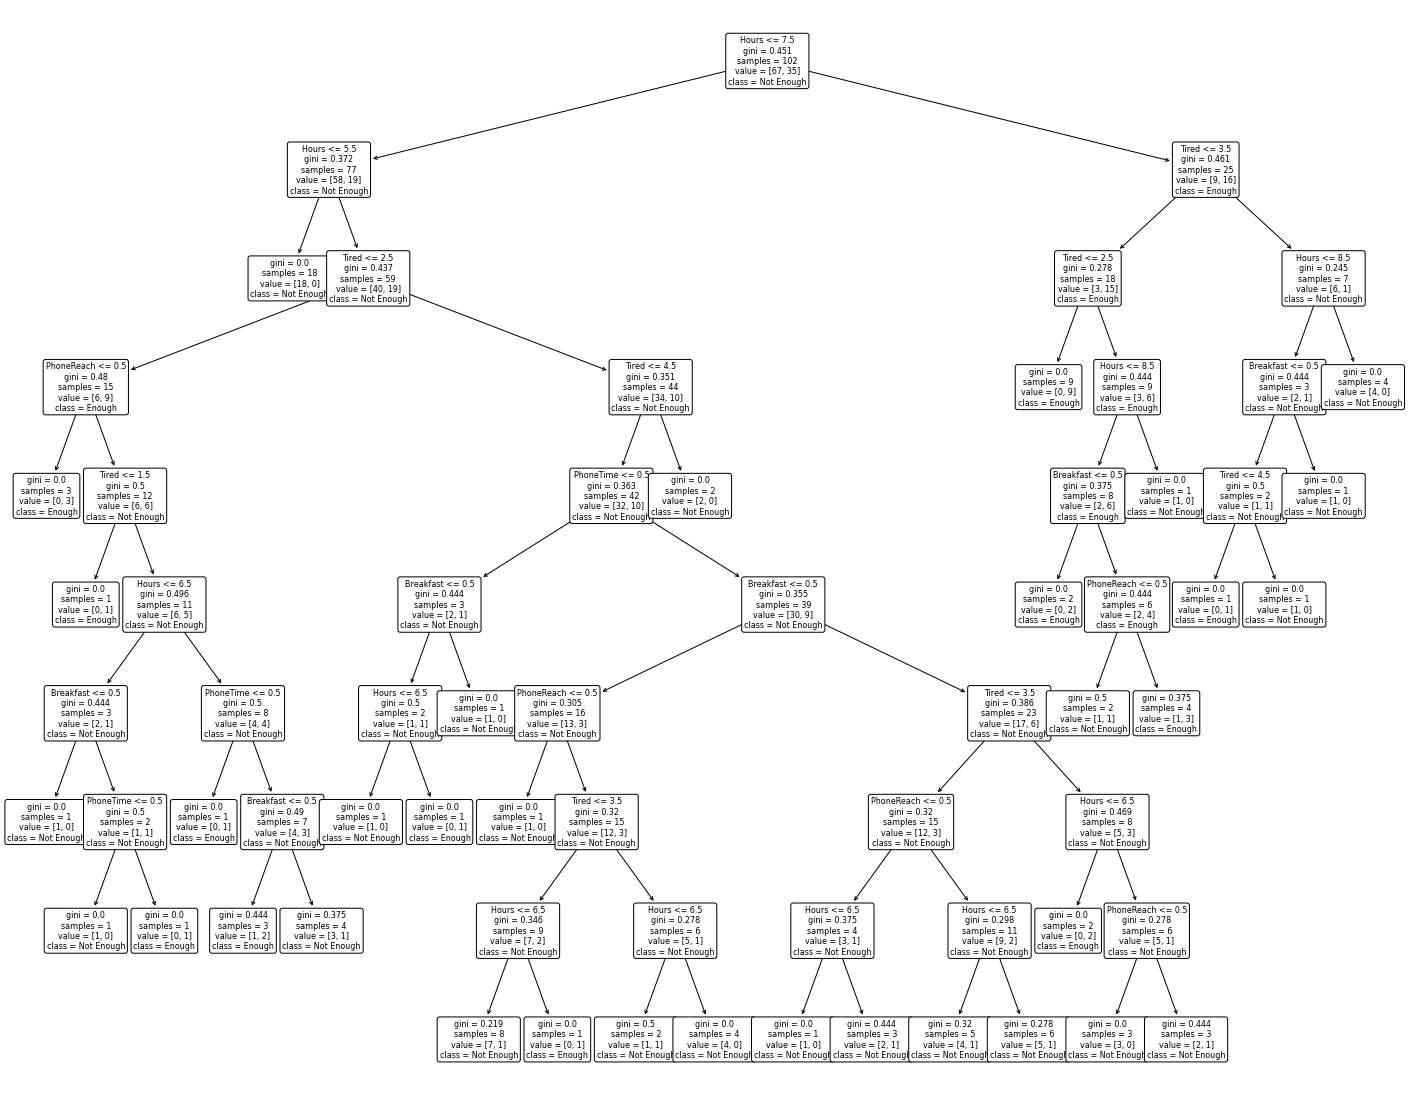

In [10]:
# Set the image size (in inches)
matplotlib.pyplot.figure(figsize = (25, 20))

# Generate the image
output = tree.plot_tree(classifier, feature_names = input_data.columns, 
                        fontsize = 8, rounded = True, class_names = ["Not Enough", "Enough"])

In [27]:
# Run the test dataset
test_dataset = load_dataset("datasets/SleepStudyPilot.csv")
test_input_data, test_output_data = get_data(test_dataset)

# Get the predictions
predictions = classifier.predict(test_input_data)

# Calculate the accuracy score
metrics.accuracy_score(test_output_data, predictions)

0.6666666666666666